FOOD DELIVERY APP DATA ANALYSIS PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Zomato data .csv")
df.shape

(148, 7)

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
def handleRate(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply (handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [6]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10824\2824338649.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  rs =sns.countplot(data=df, x = 'listed_in(type)', palette='deep')


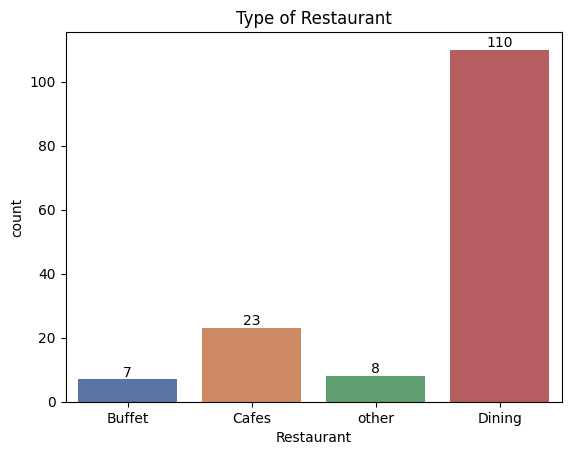

In [23]:
rs =sns.countplot(data=df, x = 'listed_in(type)', palette='deep')
plt.title('Type of Restaurant')
plt.xlabel('Restaurant')
for bar in rs.containers:
    rs.bar_label(bar)

Conclusion: The majority of the restaurants fall into the dining category.
Dining restaurants are preferred by a larger number of individuals.

Text(0, 0.5, 'Votes')

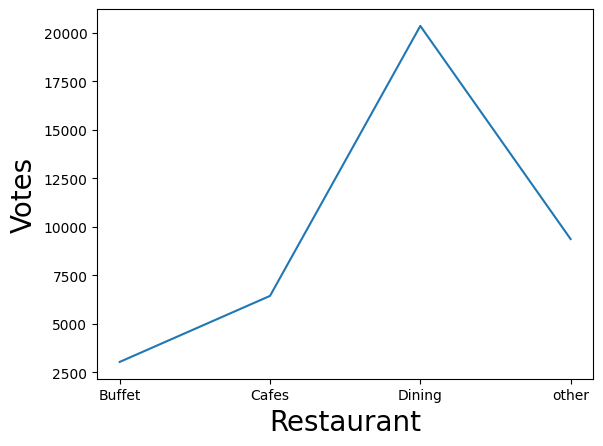

In [8]:
vo = df.groupby('listed_in(type)', as_index=False)['votes'].sum()
sns.lineplot(data=vo, x='listed_in(type)', y='votes', markers ="o")
plt.xlabel('Restaurant', size=20)
plt.ylabel('Votes', size=20)


From the above graph concluded that, "The majority of restaurants received ratings"

Text(0.5, 1.0, 'Rating Distribution')

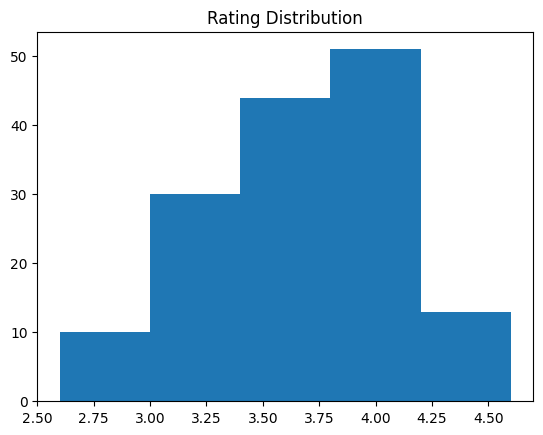

In [22]:
plt.hist(data=df, x='rate',bins=5)
plt.title('Rating Distribution')

Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.
The majority of couples prefer restaurants with an approximate cost of 300 rupees.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10824\3659401300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='approx_cost(for two people)', data=df, palette='deep')


Text(0.5, 1.0, 'Average Spending')

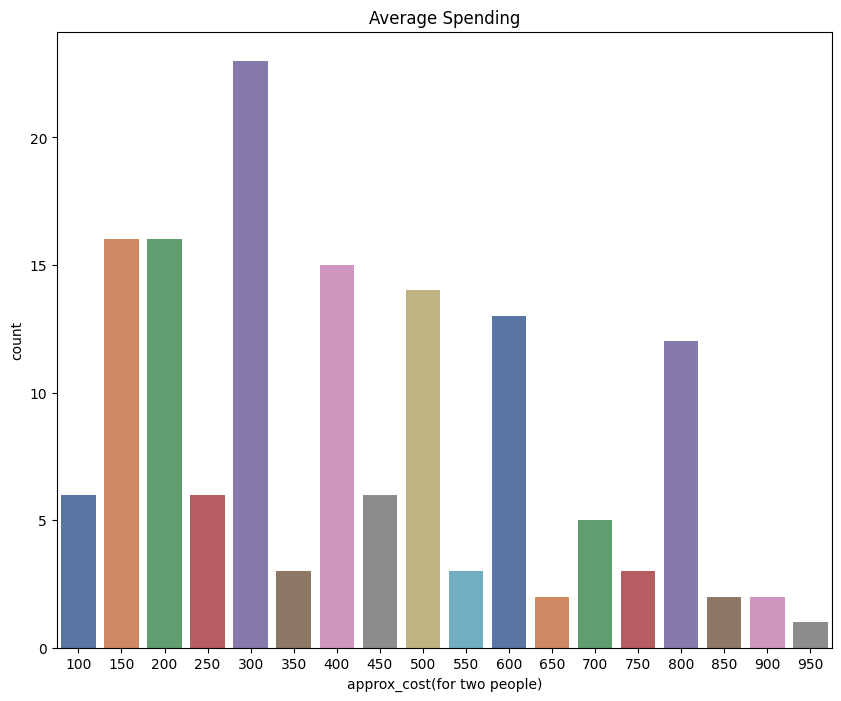

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x='approx_cost(for two people)', data=df, palette='deep')
plt.title("Average Spending")

The above graph shows, Average Spending of couples

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10824\1381810479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='online_order', y='rate', palette='deep')


<Axes: xlabel='online_order', ylabel='rate'>

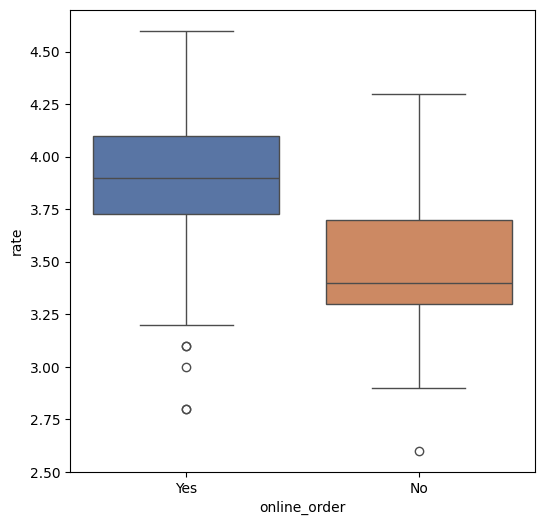

In [17]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='online_order', y='rate', palette='deep')

CONCLUSION: Offline orders received lower
ratings in comparison to online orders, which obtained excellent ratings.

Text(50.722222222222214, 0.5, 'Restaurant')

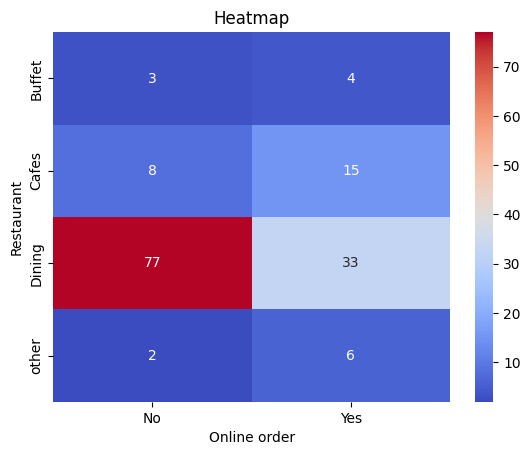

In [29]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(data=pivot_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap')
plt.xlabel('Online order')
plt.ylabel('Restaurant')

CONCLUSION: Dining restaurants primarily
accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.